In [1]:
from src.neural_networks.get_data import get_tf_data, stack_1d_features, normalize_1d_features_with_mean_std, load_cv_data
from src.neural_networks.nn_forecast import NNForecast
from src.visualization.twcrpss_plot import make_twcrpss_plot_tf
from src.visualization.brier_score import make_brier_skill_plot_tf
from src.visualization.pit import make_cpit_diagram_tf
from src.training.training import load_model

import tensorflow as tf
import numpy as np



2024-05-15 08:30:54.038219: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 08:30:54.040666: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 08:30:54.072307: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 08:30:59.726004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

features_names = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

features_names_dict = {name: 1 for name in features_names}

features_names_dict['wind_speed'] = 15

ignore = ['229', '285', '323']



In [3]:

train_data, test_data, data_info = load_cv_data(3, features_names_dict)

train_data = train_data.shuffle(len(train_data))

train_data = train_data.batch(32)

train_data = train_data.prefetch(tf.data.experimental.AUTOTUNE)


In [4]:
test_data_original = test_data



In [5]:
test_data = test_data.batch(len(test_data))

test_data = test_data.repeat()

test_data = test_data.prefetch(tf.data.experimental.AUTOTUNE)

In [6]:

filepath = '/net/pc200239/nobackup/users/hakvoort/models/conv_nn/'

crps_tn_e10 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10', train_data)

crps_tn_e10_2 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10_v2', train_data)

crps_tn_e10_3 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10_v3', train_data)

crps_tn_e10_4 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_10_v4', train_data)

crps_tn_e30 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_30', train_data)

crps_tn_e30_2 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_30_v2', train_data)

crps_tn_e30_3 = NNForecast.my_load(filepath + 'CRPS_trunc_normal_epochs_30_v3', train_data)

crps_m_e20 = NNForecast.my_load(filepath + 'CRPS_mixture_epochs_20', train_data)

crps_m_e20_2 = NNForecast.my_load(filepath + 'CRPS_mixture_epochs_20_v2', train_data)

crps_m_e30 = NNForecast.my_load(filepath + 'CRPS_mixture_epochs_30', train_data)

twCRPS_M11_STD2_C20_e15 = NNForecast.my_load(filepath + 'twCRPS_mean_11_std_2_constant_0.2_trunc_normal_epochs_15', train_data)

twCRPS_M11_STD02_C05_e15 = NNForecast.my_load(filepath + 'twCRPS_mean_11_std_0.2_constant_0.5_trunc_normal_epochs_15', train_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step


/usr/people/hakvoort/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 142 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/people/hakvoort/.local/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 154 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step


In [7]:
nn_crps_e10_models = {'CRPS_trunc_normal_epochs_10': crps_tn_e10,
                      'CRPS_trunc_normal_epochs_10_v2': crps_tn_e10_2,
                      'CRPS_trunc_normal_epochs_10_v3': crps_tn_e10_3,
                      'CRPS_trunc_normal_epochs_10_v4': crps_tn_e10_4}

nn_crps_e30_models = {'CRPS_trunc_normal_epochs_30': crps_tn_e30,
                        'CRPS_trunc_normal_epochs_30_v2': crps_tn_e30_2,
                        'CRPS_trunc_normal_epochs_30_v3': crps_tn_e30_3}

nn_crps_m_e20_models = {'CRPS_mixture_epochs_20': crps_m_e20,
                        'CRPS_mixture_epochs_20_v2': crps_m_e20_2,
                        'CRPS_mixture_epochs_30': crps_m_e30}

nn_twcrps_models = {'twCRPS_M11_STD2_C20_e15': twCRPS_M11_STD2_C20_e15,
                    'twCRPS_M11_STD02_C05_e15': twCRPS_M11_STD02_C05_e15}

In [8]:
filepath = '/net/pc200239/nobackup/users/hakvoort/models/emos/batching/'

emos_base = load_model(filepath + 'crps_batch_none_epochs_600')

emos_batch_32_epochs_50 = load_model(filepath + 'crps_batch_32_epochs_50')

emos_batch_32_epochs_150 = load_model(filepath + 'crps_batch_32_epochs_150')



Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution


244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


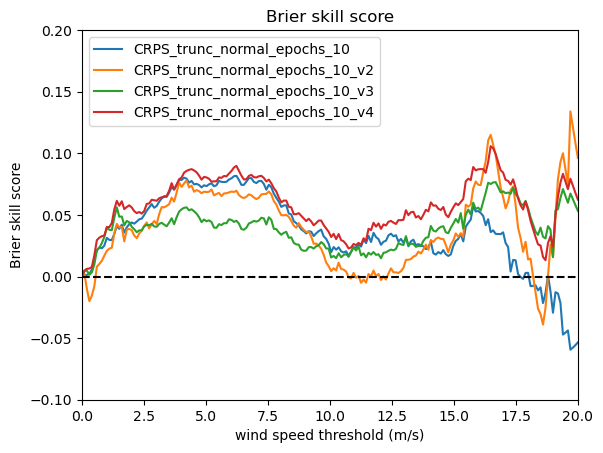

In [10]:
values = np.linspace(0, 20, 200)
ylim = [-0.1, 0.2]
make_brier_skill_plot_tf(emos_base, nn_crps_e10_models, test_data, values, ylim=ylim)

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


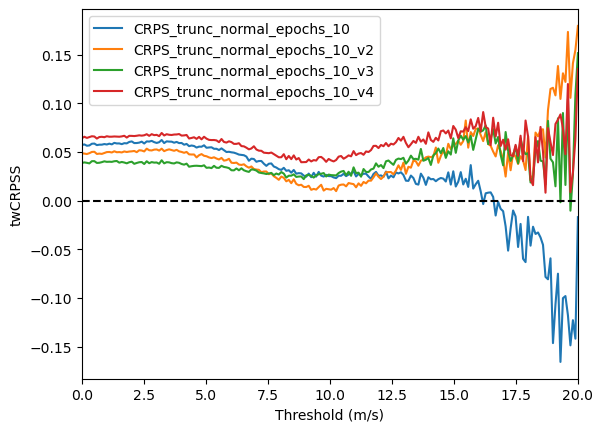

In [11]:
make_twcrpss_plot_tf(emos_base, nn_crps_e10_models, test_data, values)

Original data size: 7780
Filtered data size: -2
X shape: (7773, 5)
y shape: (7773,)
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
There are 7773 values in the PIT diagram


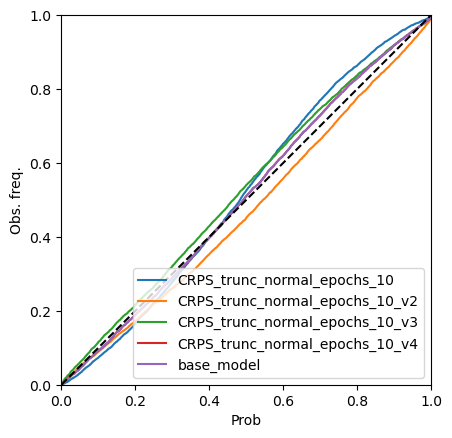

In [18]:
t = 0
make_cpit_diagram_tf(nn_crps_e10_models, test_data_original, t=t, base_model=emos_base)

In [14]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


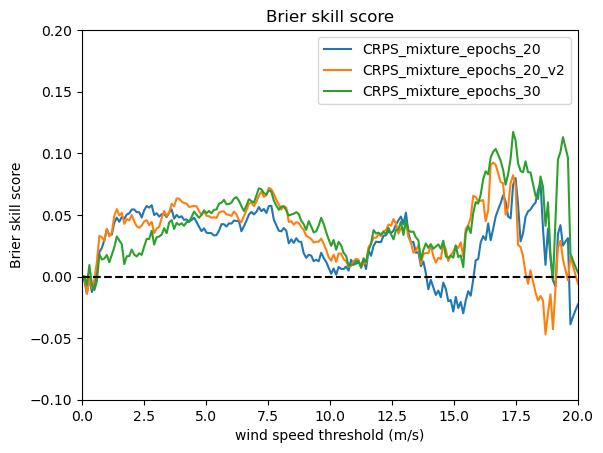

In [17]:
make_brier_skill_plot_tf(emos_base, nn_crps_m_e20_models, test_data, values, ylim=ylim)

244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


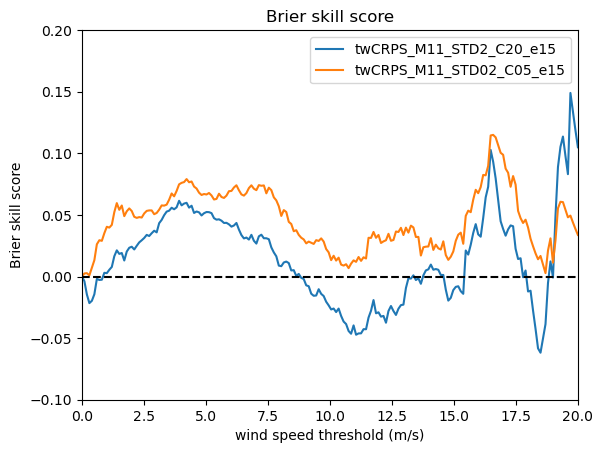

In [24]:
make_brier_skill_plot_tf(emos_base, nn_twcrps_models, test_data, values, ylim=ylim)